# Zomato_Restaurant Project-:

# Importing all the Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing our zomato dataset

In [2]:
df=pd.read_csv('zomato_restaurant.csv',encoding='latin-1')
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


# STATISTICS ON THE DATASET

In [3]:
#numbers of rows and columns in our dataset
df.shape

(9551, 21)

# Columns along with its datatype information can be displayed using this info() function

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

# Displaying all the columns in the dataset

In [5]:
#displaying all columns in our dataset
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

# Basic statistic details of the dataset is shown using the describe() function-ONLY NUMERICAL VARIABLES displayed

In [6]:
#provides the basic statistics details of the dataset
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


# Observation

There are 9551 rows in all columns and there are no missing data in numeric columns.

# Average Cost for two

The Standard Deviation is very high on 'Average Cost for two'. It is for different countries having different currency.
There are 15 countries in this dataset and their currencies are not standardized.
Look at the maximum of average price for two : 800000.

# Data Cleaning

# MISSING VALUES

# 1. FINDING MISSING VALUES USING FUNCTIONS

In [7]:
#finding missing values in our dataset
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

***Displays all the null values in every column- 'Cuisines' column has 9 missing values hence, feature engineering has to be performed on that column

# 2. FINDING MISSING VALUES USING QUERY

Another easier way to display only the missing valued columns instead of all the columns unlike the previous function is the Query option

In [8]:
#finding missing values using a simple query
[features for features in df.columns if df[features].isnull().sum() >0]

['Cuisines']

# MERGING 2 FILES

In [9]:
df_country=pd.read_excel('Country-Code.xlsx')
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [10]:
final_df=pd.merge(df,df_country,on='Country Code', how='left')

In [11]:
final_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


***Our final dataset has the 'Country' column added at the end of our new dataset(which is the additonal column) that has been added from excel to our dataset. Creating the final dataset

In [13]:
final_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

# Univariate Analysis

**FEATURE SELECTION
Our final dataset has many features , let us a pick a few features & draw insights from our dataset

# 1. TOP 3 CONTRIES WITH MAXIMUM NUMBER OF ORDERS

In [14]:
#displaying the total number of records based on country

final_df.Country.value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

***INFERENCE --> From this we can summarize that the maximum number of transactions happen in India

# PIE CHART VISUALIZATION

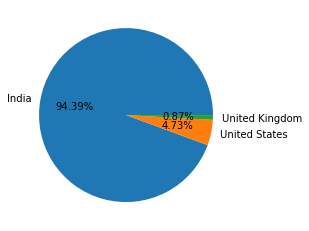

In [15]:
#pie chart to display the top 3 countries with maximum orders

country_names = final_df.Country.value_counts().index                 #getting the country names
country_val = final_df.Country.value_counts().values                  # number of records of each country

plt.pie(country_val[:3],labels=country_names[:3], autopct='%1.2f%%')  #autopct used for getting percentage values 
plt.show()

***INFERENCE --> The top 3 countries with maximum number of orders are India (with maximum), USA and then UK.

# CITY DISTRIBUTION OF TOP 5 CITIES

<function matplotlib.pyplot.show(close=None, block=None)>

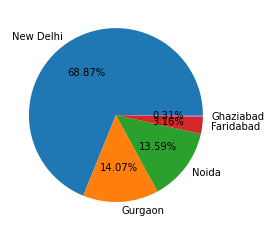

In [16]:
#pie chart for cities distribution - displaying the top 5 cities

city_val = final_df.City.value_counts()
city_label = final_df.City.value_counts().index

plt.pie(x = city_val[:5],labels = city_label[:5],autopct='%1.2f%%')
plt.show

# INFERENCE - Maximum transactions happen in New Delhi of India

# Which countries have the highest number of restaurants in Zomato

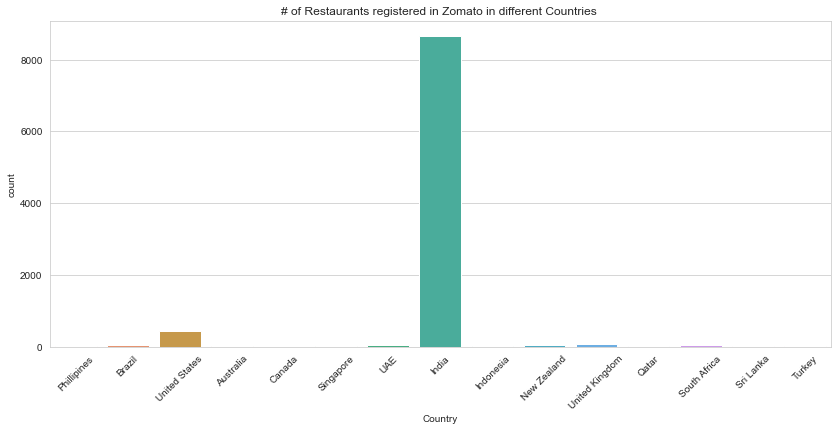

In [17]:
"""
The background is whitegrid
The figure size is 14*6 
The x-axis labels are written with a rotation of 45 degree
setting the title to "# of Restaurants registered in Zomato in different Countries 
"""

sns.set_style('whitegrid')
plt.figure(figsize = (14,6))
sns.countplot(x= 'Country', data=final_df)
plt.xticks(rotation=45)
plt.title("# of Restaurants registered in Zomato in different Countries ");

**Most of the reataurants are from India.

* India - 8652

* World - 9551**

# Bivariate Analysis

# COUNTRY WITH MOST RATINGS

In [18]:
#displaying the ratings related columns in a dataframe format
final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index()

,Aggregate rating,Rating color,Rating text,0
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


# INFERENCE ->

* Rating color is WHITE when it is NOT RATED
* Rating color is RED when it is POOR
* Rating color is ORANGE when it is AVERAGE
* Rating color is YELLOW when it is GOOD
* Rating color is GREEN when it is VERY GOOD
* Rating color is DARK GREEN when it is EXCELLENT

In [19]:
#renaming the 0  column to rating count for readability (storing it as a dataset)

ratings = final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

#displaying first five records in the ratings dataset

ratings.head()

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


**INFERENCE--> Around 2k ppl have given zero ratings.

ratings (4.5-4.9)=excellent. 4.0 to 4.4=v.good. 3.5 to 3.9=good. 2.5 to 3.4 = average & so on**

# BAR CHART VISUALIZATION

Text(0.5, 1.0, 'User Ratings')

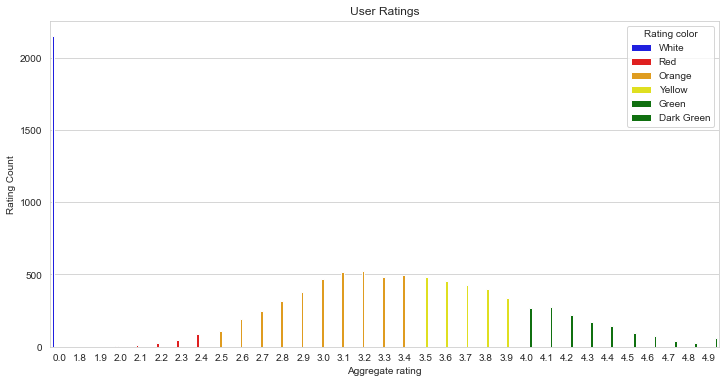

In [20]:
#observing the same bar plot in the rating colors


plt.rcParams['figure.figsize'] = (12,6)
sns.barplot(x='Aggregate rating',y='Rating Count',hue = 'Rating color',data=ratings,palette=['blue','red','orange','yellow','green','green'])
plt.title('User Ratings')

* Displaying the user rating count in a bar plot. But this would be better if the ratings are displayed in the same color as that of the rating color. Let us replot with each rating's own color

* Perfect color mapping is done

# INFERENCE- Count of the not rated ones are the highest(white-BLUE for visibility)

* Ratings between 4.5 to 4.9 is Excellent (Dark Green)

* Ratings between 4.0 to 4.4 is Very Good (Green)

* Ratings between 3.5 to 3.9 is Good (Yellow)

* Ratings between 2.5 to 3.4 is Average (Orange)

* Ratings between 1.8 to 2.4 is Poor (Red)

# COUNT THE RATINGS

# COUNT PLOT VISUALIZATION

<AxesSubplot:xlabel='Rating color', ylabel='count'>

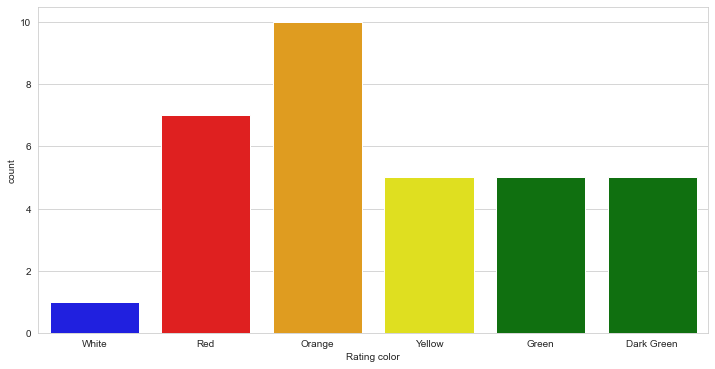

In [21]:
#countplot to count the total rating based on color

sns.countplot(x='Rating color',data=ratings,palette=['blue','red','orange','yellow','green','green'])

# Here we check the relationship between two variables.

<AxesSubplot:xlabel='Aggregate rating', ylabel='Votes'>

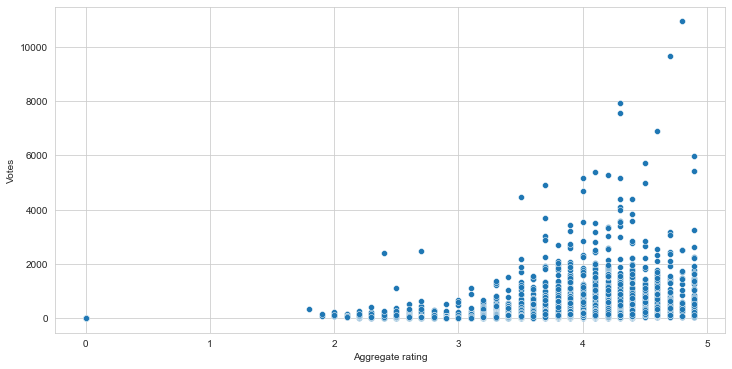

In [22]:
# Relationship between Aggregate Ratings and Votes

sns.scatterplot(x=final_df['Aggregate rating'], y= final_df['Votes'])

# As the quality of food gets better, the aggregate ratings increases and the number of voters also increase.

<AxesSubplot:xlabel='Aggregate rating', ylabel='Votes'>

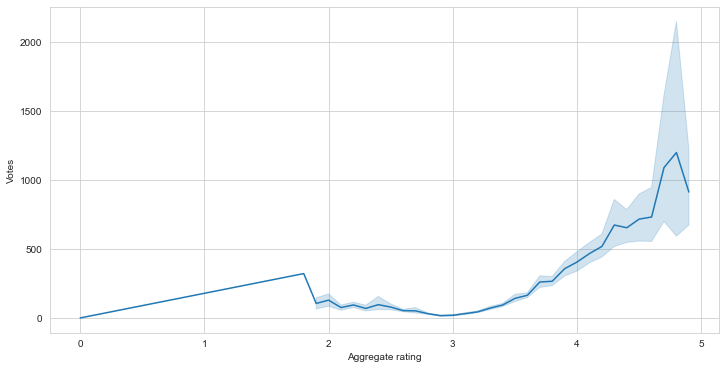

In [23]:
# Relationship between Aggregate Ratings and Votes

sns.lineplot(x=final_df['Aggregate rating'], y= final_df['Votes'])

***** Here we can clearly see that with increase in Price range, the median of ratings also increase.

# Multivariate Analysis

# COUNTRIES WITH ZERO RATINGS

In [24]:
#finding the names of the countries that has given zero rating

final_df[final_df['Rating color'] == 'White'].groupby('Country').size().reset_index()
final_df.groupby(['Aggregate rating','Country']).size().reset_index().head(5)

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1


****INFERENCE--> Out of 2148 records , there are 2139 zero ratings which is from India(being the maximum)

# CURRENCY USED IN EACH COUNTRY

In [25]:
#finding which currency is used in which country

final_df[['Country','Currency']].groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


# TOP 10 CUISINES

# PIE CHART VISUALIZATION

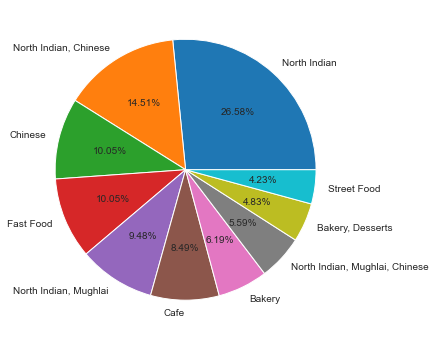

In [26]:
#pie chart to display the top 10 cuisines

cuisine_val = final_df.Cuisines.value_counts()              #values
cuisine_label = final_df.Cuisines.value_counts().index      #labels

plt.pie(x = cuisine_val[:10],labels = cuisine_label[:10],autopct='%1.2f%%')
plt.show()

****Most ordered cuisine is North Indian

# Statical Analysis

# Correlation plot of numeric columns

In [27]:
correlation = final_df[['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']].corr()
correlation

,Average Cost for two,Price range,Aggregate rating,Votes
Average Cost for two,1.000000,0.075083,0.051792,0.067783
Price range,0.075083,1.000000,0.437944,0.309444
Aggregate rating,0.051792,0.437944,1.000000,0.313691
Votes,0.067783,0.309444,0.313691,1.000000


<AxesSubplot:>

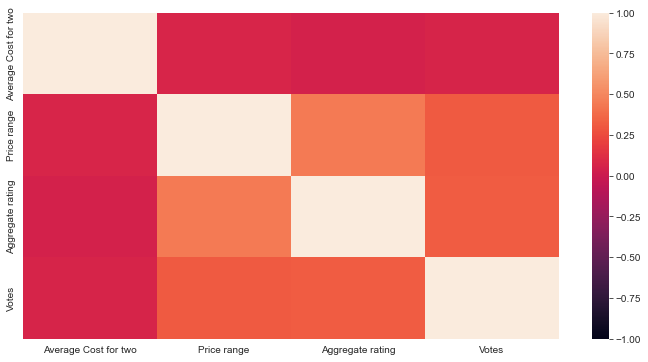

In [28]:
sns.heatmap(correlation, vmin = -1, vmax = 1)

# ******Observation

* There is some correlation between Price range and Aggregate rating

* The rest of the columns have no correlation.

* If the Price range is higher, people should rate the restaurant higher.

# Distribution of Aggregate Rating

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


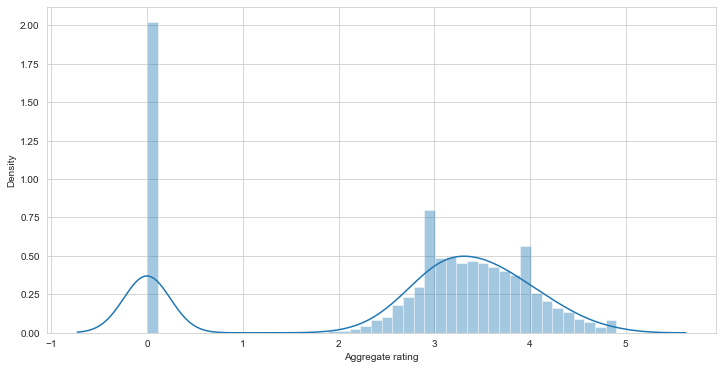

In [29]:
sns.distplot(final_df['Aggregate rating']);

****Observation:
A lot of restaurants are rated 0. After this most of the restaurants have been rated between 3 and 4.

<AxesSubplot:xlabel='Price range', ylabel='Aggregate rating'>

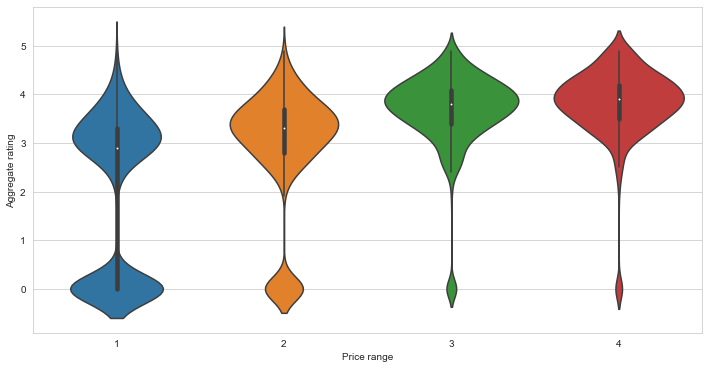

In [30]:
# Relationship between Price range and Aggregate Ratings

sns.violinplot(x='Price range', y='Aggregate rating', data = final_df)

*****Here we can clearly see that with increase in Price range, the median of ratings also increase.

# Zomato India

Objective: Our goal is to analyze which restaurants have poor ratings in Zomato and why?

The number of restaurants registered in Zomato is highest in India.

So lets look at the data of these restaurants.

In [31]:
zomato_india = final_df[final_df['Country'] == 'India']    # Filter the country by India and create a new dataframe
zomato_india.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,No,No,No,No,3,3.9,Yellow,Good,140,India
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,No,No,No,No,2,3.5,Yellow,Good,71,India
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,No,No,No,No,2,3.6,Yellow,Good,94,India
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,No,No,No,No,2,4.0,Green,Very Good,87,India
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,No,No,No,No,3,4.2,Green,Very Good,177,India


We have aggregate ratings and Rating text as two column of interest.

In [32]:
zomato_india.groupby('Rating text').mean()              # Perform groupby using Rating text

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
Rating text,,,,,,,,
Average,6.000801e+06,1.0,75.093777,27.697238,548.232735,1.617727,3.048722,47.844209
Excellent,8.174877e+06,1.0,75.245783,21.945669,1173.706897,2.706897,4.646552,1184.206897
Good,6.617615e+06,1.0,74.262800,26.541428,865.522469,2.108825,3.677423,238.798592
Not rated,1.558888e+07,1.0,66.939717,24.793691,341.598878,1.231417,0.000000,0.866293
Poor,2.864800e+06,1.0,76.802650,28.368948,647.777778,1.816667,2.296111,87.550000
Very Good,8.379847e+06,1.0,74.077409,24.585563,1148.771676,2.566474,4.153324,599.929191


Excellent and Very Good food ratings are provided in restaurants which are slightly premium cost and high price range.

They also have huge number of votes. This can be due to high quality food or ambience due to which the price is high and so the ratings are good.

<AxesSubplot:xlabel='Rating text', ylabel='Average Cost for two'>

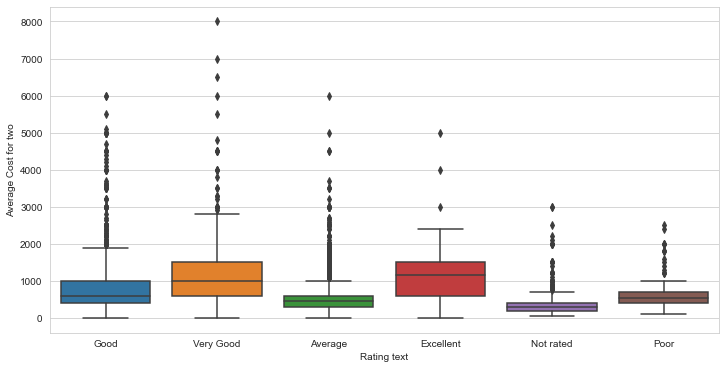

In [33]:
# Relationship between Average Cost for two and Rating text

sns.boxplot(y = 'Average Cost for two', x = 'Rating text', data = zomato_india)

**** Ratings improve as the average cost for two increases.



<AxesSubplot:xlabel='Rating text', ylabel='Price range'>

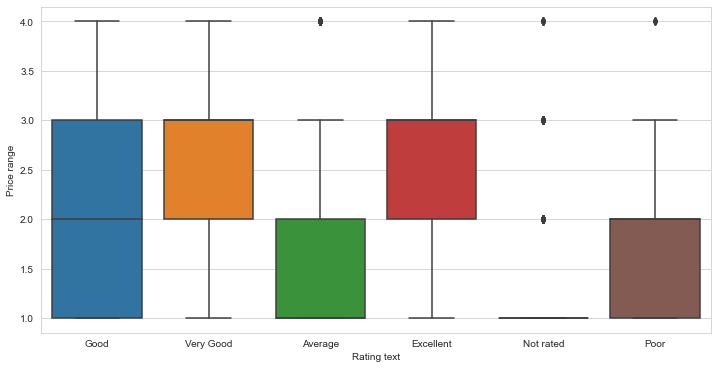

In [34]:
# Relationship between Price range and Rating text

sns.boxplot(y = 'Price range', x = 'Rating text', data = zomato_india)

***** Excellent and Very Good restaurants have very high price.

Average and Poor have the lowest price range.

# Conclusion

1.Zomato operate predominantly in India

2
* When Rating is between 4.5 to 4.9 = Excellant

* When Rating is between 4.0 to 4.4 = Very Good

* When Rating is between 3.5 to 3.9 = Good

* When Rating is between 2.1 to 3.4 = Average

* When Rating is less than 2.0 = Poor
3
* Not rated count is very high

* Maximum number of ratings re between 2.5 to 3.4

4.Maximum zero ratings from India customers

5.Online deliveries are available in India and UAE

6.North Indian is the most popular cuisine. So we can infer that these North Indian restaurants in Gurgaon and Noida which do not provide authentic North Indian dishes and that is why customers are unhappy and rate them poorly.